In [117]:
##Prevision consommation gaz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pandas requests meteostat
from datetime import datetime
import pandas as pd
from meteostat import Stations, Daily
import pandas as od
import seaborn as sns
import matplotlib.pyplot as plt


In [118]:
## Récupérons les données de consommation du gaz en France via GRDF
GRDF=pd.read_csv("GRDF.csv")
GRDF.head()

,Numéro de semaine,Date début de semaine,Date fin de semaine,Volume PEC - Période 2018/2019,Volume PEC - Période 2022/2023,Volume Industriel - Période 2018/2019,Volume Industriel - Période 2022/2023,Volume DP - Brute - Période 2018/2019,Volume DP - Brute - Période 2022/2023,Volume DP - Corrigé du climat - Période 2018/2019,Volume DP - Corrigé du climat - Période 2022/2023,Volume Total - Brute - Période 2018/2019,Volume Total - Brute - Période 2022/2023,Volume Total - Corrigé du climat - Période 2018/2019,Volume Total - Corrigé du climat - Période 2022/2023,Volume Consommation Finale - Brute - Période 2018/2019,Volume Consommation Finale - Brute - Période 2022/2023,Volume Consommation Finale - Corrigé du climat - Période 2018/2019,Volume Consommation Finale - Corrigé du climat - Période 2022/2023,Année
0,35,",,,,,,,,,,,,,,,",2022-09-04,0.80,1.30,2.35,1.82,1.76,1.57,1.75,1.69,4.91,4.69,4.90,4.81,4.11,3.39,4.09,3.51,2022
1,38,2022-09-19,2022-09-25,0.40,1.15,2.62,2.12,2.16,2.27,2.12,1.70,5.18,5.54,5.14,4.97,4.77,4.39,4.74,3.81,2022
2,40,2022-10-03,2022-10-09,0.87,1.22,2.66,2.09,3.16,2.79,3.30,2.67,6.69,6.11,6.83,5.99,5.82,4.88,5.96,4.76,2022
3,7,2023-02-13,2023-02-19,1.27,1.23,3.20,2.53,9.40,7.58,10.86,9.19,13.87,11.34,15.33,12.95,12.60,10.11,14.07,11.72,2023
4,21,2023-05-22,2023-05-28,0.65,0.32,2.39,1.69,2.56,2.01,2.49,2.05,5.61,4.02,5.53,4.06,4.95,3.70,4.88,3.74,2023


In [119]:
GRDF.tail()

,Numéro de semaine,Date début de semaine,Date fin de semaine,Volume PEC - Période 2018/2019,Volume PEC - Période 2022/2023,Volume Industriel - Période 2018/2019,Volume Industriel - Période 2022/2023,Volume DP - Brute - Période 2018/2019,Volume DP - Brute - Période 2022/2023,Volume DP - Corrigé du climat - Période 2018/2019,Volume DP - Corrigé du climat - Période 2022/2023,Volume Total - Brute - Période 2018/2019,Volume Total - Brute - Période 2022/2023,Volume Total - Corrigé du climat - Période 2018/2019,Volume Total - Corrigé du climat - Période 2022/2023,Volume Consommation Finale - Brute - Période 2018/2019,Volume Consommation Finale - Brute - Période 2022/2023,Volume Consommation Finale - Corrigé du climat - Période 2018/2019,Volume Consommation Finale - Corrigé du climat - Période 2022/2023,Année
48,51,2022-12-19,2022-12-25,0.50,0.71,3.13,2.21,8.40,6.43,10.54,9.18,12.03,9.36,14.17,12.10,11.53,8.64,13.67,11.39,2022
49,1,2023-01-02,2023-01-08,1.50,0.42,3.54,2.27,11.44,6.72,11.31,10.07,16.48,9.41,16.36,12.76,14.98,8.99,14.86,12.34,2023
50,3,2023-01-16,2023-01-22,1.73,1.55,3.53,2.58,12.26,11.03,11.53,10.19,17.52,15.16,16.79,14.32,15.79,13.61,15.06,12.77,2023
51,10,2023-03-06,2023-03-12,0.13,0.95,3.01,2.46,8.00,7.61,9.36,7.79,11.13,11.02,12.49,11.20,11.01,10.07,12.37,10.25,2023
52,13,2023-03-27,2023-04-02,0.73,0.31,2.80,2.13,5.95,5.58,6.78,5.95,9.48,8.02,10.31,8.39,8.76,7.71,9.59,8.08,2023


In [120]:
#Le DataFrame GRDF va être modifié pour avoir des données quotidiennes, hypothèses de repartition linéaire appliquée
#D'abord on remplace valeur manquante
GRDF.loc[0,"Date début de semaine"]="30-08-22"
GRDF['Date début de semaine'] = pd.to_datetime(GRDF['Date début de semaine'])
GRDF['Date fin de semaine'] = pd.to_datetime(GRDF['Date fin de semaine'])

In [121]:
GRDF.head()

,Numéro de semaine,Date début de semaine,Date fin de semaine,Volume PEC - Période 2018/2019,Volume PEC - Période 2022/2023,Volume Industriel - Période 2018/2019,Volume Industriel - Période 2022/2023,Volume DP - Brute - Période 2018/2019,Volume DP - Brute - Période 2022/2023,Volume DP - Corrigé du climat - Période 2018/2019,Volume DP - Corrigé du climat - Période 2022/2023,Volume Total - Brute - Période 2018/2019,Volume Total - Brute - Période 2022/2023,Volume Total - Corrigé du climat - Période 2018/2019,Volume Total - Corrigé du climat - Période 2022/2023,Volume Consommation Finale - Brute - Période 2018/2019,Volume Consommation Finale - Brute - Période 2022/2023,Volume Consommation Finale - Corrigé du climat - Période 2018/2019,Volume Consommation Finale - Corrigé du climat - Période 2022/2023,Année
0,35,2022-08-30,2022-09-04,0.80,1.30,2.35,1.82,1.76,1.57,1.75,1.69,4.91,4.69,4.90,4.81,4.11,3.39,4.09,3.51,2022
1,38,2022-09-19,2022-09-25,0.40,1.15,2.62,2.12,2.16,2.27,2.12,1.70,5.18,5.54,5.14,4.97,4.77,4.39,4.74,3.81,2022
2,40,2022-10-03,2022-10-09,0.87,1.22,2.66,2.09,3.16,2.79,3.30,2.67,6.69,6.11,6.83,5.99,5.82,4.88,5.96,4.76,2022
3,7,2023-02-13,2023-02-19,1.27,1.23,3.20,2.53,9.40,7.58,10.86,9.19,13.87,11.34,15.33,12.95,12.60,10.11,14.07,11.72,2023
4,21,2023-05-22,2023-05-28,0.65,0.32,2.39,1.69,2.56,2.01,2.49,2.05,5.61,4.02,5.53,4.06,4.95,3.70,4.88,3.74,2023


In [122]:
GRDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Numéro de semaine                                                   53 non-null     int64         
 1   Date début de semaine                                               53 non-null     datetime64[ns]
 2   Date fin de semaine                                                 53 non-null     datetime64[ns]
 3   Volume PEC - Période 2018/2019                                      53 non-null     float64       
 4   Volume PEC - Période 2022/2023                                      53 non-null     float64       
 5   Volume Industriel - Période 2018/2019                               53 non-null     float64       
 6   Volume Industriel - Période 2022/2023                       

In [123]:
# Répartir les volumes hebdomadaires sur les jours de la semaine
# Créer une liste pour stocker les données journalières
journaliere_data = []

# Répartir les volumes hebdomadaires sur les jours de la semaine
for index, row in GRDF.iterrows():
    start_date = row['Date début de semaine']
    end_date = row['Date fin de semaine']
    total_volume = row['Volume Consommation Finale - Brute - Période 2022/2023']
    
    # Calculer le volume journalier
    days_count = (end_date - start_date).days + 1
    daily_volume = total_volume / days_count

    # Ajouter une entrée pour chaque jour de la semaine
    for single_date in pd.date_range(start_date, end_date):
        journaliere_data.append({'jour': single_date, 'volume journalier': daily_volume})

# Convertir la liste de données en DataFrame
grdf = pd.DataFrame(journaliere_data)

# Afficher le DataFrame final
grdf.head()

,jour,volume journalier
0,2022-08-30,0.565
1,2022-08-31,0.565
2,2022-09-01,0.565
3,2022-09-02,0.565
4,2022-09-03,0.565


In [124]:
grdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   jour               364 non-null    datetime64[ns]
 1   volume journalier  364 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [125]:
# Définir les dates de début et de fin
start = datetime(2022, 1, 2)
end = datetime(2022, 12, 31)

#Nombre de stations
n=10

# Rechercher des stations météorologiques en France
stations = Stations()
stations = stations.region('FR')
stations = stations.fetch(n)  # Obtenir les 10 premières stations

# Sélectionner une station (par exemple la première)
station_id = stations.index[0]  # Utiliser l'identifiant de la station

# Télécharger les données quotidiennes pour la station sélectionnée
data = Daily(station_id, start, end)
data = data.fetch()

# Créer un DataFrame
df = pd.DataFrame(data)

# Afficher les premières lignes du DataFrame
df.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2022-01-02,12.0,10.7,14.1,NaN,NaN,218.0,34.0,77.8,1013.7,NaN
2022-01-03,9.8,8.6,11.0,NaN,NaN,228.0,30.3,75.9,1010.9,NaN
2022-01-04,7.0,3.6,9.1,NaN,NaN,264.0,23.0,59.3,1000.5,NaN
2022-01-05,4.6,3.8,5.6,NaN,NaN,317.0,27.8,55.5,1012.4,NaN
2022-01-06,4.4,1.6,6.5,NaN,NaN,197.0,17.2,64.8,1018.7,NaN


In [126]:
df.info

<bound method DataFrame.info of             tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2022-01-02  12.0  10.7  14.1   NaN   NaN  218.0  34.0  77.8  1013.7   NaN
2022-01-03   9.8   8.6  11.0   NaN   NaN  228.0  30.3  75.9  1010.9   NaN
2022-01-04   7.0   3.6   9.1   NaN   NaN  264.0  23.0  59.3  1000.5   NaN
2022-01-05   4.6   3.8   5.6   NaN   NaN  317.0  27.8  55.5  1012.4   NaN
2022-01-06   4.4   1.6   6.5   NaN   NaN  197.0  17.2  64.8  1018.7   NaN
...          ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
2022-12-27   8.5   7.7   9.5   3.9   NaN  228.0  29.5  66.7  1022.6   NaN
2022-12-28   9.5   8.4  10.7   8.9   NaN  197.0  38.8  85.2  1007.5   NaN
2022-12-29   9.7   7.9  10.6   8.0   NaN  235.0  43.0  83.3  1003.6   NaN
2022-12-30   9.1   5.6  11.9  13.0   NaN  196.0  35.8  79.6  1002.0   NaN
2022-12-31  12.9  10.3  15.4  13.9   NaN  202.0  37.7  83.3  1004.1   NaN

[364 

In [127]:
DF=pd.DataFrame()
for i in range(0,n):
    print(i)
    station_id=stations.index[i]
    data = Daily(station_id, start, end)
    data = data.fetch()
    df = pd.DataFrame(data)
    DF['station'+str(i)]=df['tavg']
DF.head()
    
    

0
1
2
3
4
5
6
7
8
9


,station0,station1,station2,station3,station4,station5,station6,station7,station8,station9
time,,,,,,,,,,
2022-01-02,12.0,12.3,11.8,13.1,10.3,11.3,11.8,12.2,11.7,11.5
2022-01-03,9.8,9.6,9.7,11.1,8.3,9.6,10.7,11.1,10.7,9.7
2022-01-04,7.0,7.4,6.5,7.8,6.9,7.3,8.7,8.7,8.8,6.8
2022-01-05,4.6,5.3,4.3,6.0,3.5,2.5,6.8,7.7,7.0,5.7
2022-01-06,4.4,3.5,3.7,5.8,3.2,2.7,6.8,7.9,7.1,5.3


In [128]:
DF.tail()

,station0,station1,station2,station3,station4,station5,station6,station7,station8,station9
time,,,,,,,,,,
2022-12-27,8.5,8.8,6.4,7.8,5.8,5.6,9.2,10.6,9.4,7.6
2022-12-28,9.5,10.2,9.8,10.1,9.6,9.0,10.9,11.2,11.0,9.7
2022-12-29,9.7,9.6,8.7,10.3,9.3,9.2,9.7,10.4,9.7,8.2
2022-12-30,9.1,9.4,9.4,9.4,8.8,9.0,11.1,11.3,11.2,10.0
2022-12-31,12.9,14.2,15.1,14.3,14.9,14.3,13.2,12.9,13.1,12.9


In [129]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2022-01-02 to 2022-12-31
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   station0  364 non-null    float64
 1   station1  364 non-null    float64
 2   station2  364 non-null    float64
 3   station3  364 non-null    float64
 4   station4  364 non-null    float64
 5   station5  352 non-null    float64
 6   station6  363 non-null    float64
 7   station7  364 non-null    float64
 8   station8  363 non-null    float64
 9   station9  364 non-null    float64
dtypes: float64(10)
memory usage: 31.3 KB


In [130]:
grdf.head()

,jour,volume journalier
0,2022-08-30,0.565
1,2022-08-31,0.565
2,2022-09-01,0.565
3,2022-09-02,0.565
4,2022-09-03,0.565


In [131]:
grdf.tail()

,jour,volume journalier
359,2023-03-29,1.101429
360,2023-03-30,1.101429
361,2023-03-31,1.101429
362,2023-04-01,1.101429
363,2023-04-02,1.101429


In [132]:
grdf.dtypes

jour                 datetime64[ns]
volume journalier           float64
dtype: object

In [133]:
grdf.info

<bound method DataFrame.info of           jour  volume journalier
0   2022-08-30           0.565000
1   2022-08-31           0.565000
2   2022-09-01           0.565000
3   2022-09-02           0.565000
4   2022-09-03           0.565000
..         ...                ...
359 2023-03-29           1.101429
360 2023-03-30           1.101429
361 2023-03-31           1.101429
362 2023-04-01           1.101429
363 2023-04-02           1.101429

[364 rows x 2 columns]>

In [134]:
grdf['volume journalier'].tolist()

[0.5650000000000001,
 0.5650000000000001,
 0.5650000000000001,
 0.5650000000000001,
 0.5650000000000001,
 0.5650000000000001,
 0.6271428571428571,
 0.6271428571428571,
 0.6271428571428571,
 0.6271428571428571,
 0.6271428571428571,
 0.6271428571428571,
 0.6271428571428571,
 0.6971428571428572,
 0.6971428571428572,
 0.6971428571428572,
 0.6971428571428572,
 0.6971428571428572,
 0.6971428571428572,
 0.6971428571428572,
 1.4442857142857142,
 1.4442857142857142,
 1.4442857142857142,
 1.4442857142857142,
 1.4442857142857142,
 1.4442857142857142,
 1.4442857142857142,
 0.5285714285714286,
 0.5285714285714286,
 0.5285714285714286,
 0.5285714285714286,
 0.5285714285714286,
 0.5285714285714286,
 0.5285714285714286,
 0.47714285714285715,
 0.47714285714285715,
 0.47714285714285715,
 0.47714285714285715,
 0.47714285714285715,
 0.47714285714285715,
 0.47714285714285715,
 0.44571428571428573,
 0.44571428571428573,
 0.44571428571428573,
 0.44571428571428573,
 0.44571428571428573,
 0.44571428571428573,


In [135]:
grdf.head()

,jour,volume journalier
0,2022-08-30,0.565
1,2022-08-31,0.565
2,2022-09-01,0.565
3,2022-09-02,0.565
4,2022-09-03,0.565


In [136]:
DF['conso']=grdf['volume journalier'].values

In [137]:
DF.head()

,station0,station1,station2,station3,station4,station5,station6,station7,station8,station9,conso
time,,,,,,,,,,,
2022-01-02,12.0,12.3,11.8,13.1,10.3,11.3,11.8,12.2,11.7,11.5,0.565
2022-01-03,9.8,9.6,9.7,11.1,8.3,9.6,10.7,11.1,10.7,9.7,0.565
2022-01-04,7.0,7.4,6.5,7.8,6.9,7.3,8.7,8.7,8.8,6.8,0.565
2022-01-05,4.6,5.3,4.3,6.0,3.5,2.5,6.8,7.7,7.0,5.7,0.565
2022-01-06,4.4,3.5,3.7,5.8,3.2,2.7,6.8,7.9,7.1,5.3,0.565


In [138]:
DF.tail()

,station0,station1,station2,station3,station4,station5,station6,station7,station8,station9,conso
time,,,,,,,,,,,
2022-12-27,8.5,8.8,6.4,7.8,5.8,5.6,9.2,10.6,9.4,7.6,1.101429
2022-12-28,9.5,10.2,9.8,10.1,9.6,9.0,10.9,11.2,11.0,9.7,1.101429
2022-12-29,9.7,9.6,8.7,10.3,9.3,9.2,9.7,10.4,9.7,8.2,1.101429
2022-12-30,9.1,9.4,9.4,9.4,8.8,9.0,11.1,11.3,11.2,10.0,1.101429
2022-12-31,12.9,14.2,15.1,14.3,14.9,14.3,13.2,12.9,13.1,12.9,1.101429


In [139]:
#Ajout du prix spot TTF
import yfinance as yf
import mplfinance as mpf

ttf='TTF=F'
data=yf.Ticker(ttf)
TTF=data.history(period='1d',start='2022-1-2', end='2023-12-30')

# Créer un DataFrame avec toutes les dates de l'année 2022
all_dates = pd.date_range(start='2022-01-02', end='2022-12-31', freq='D')
df_all_dates = pd.DataFrame(all_dates, columns=['Date'])

# Assurez-vous que l'index de TTF est de type datetime sans fuseau horaire
TTF.index = pd.to_datetime(TTF.index).tz_localize(None)
TTF = TTF.reset_index()
TTF.rename(columns={'Date': 'Date'}, inplace=True)

# Fusionner les deux DataFrames
merged_df = pd.merge(df_all_dates, TTF, on='Date', how='left')

# Remplir les valeurs manquantes avec les valeurs de la ligne précédente
merged_df.ffill(inplace=True)

# Remplir les valeurs manquantes restantes avec les valeurs de la ligne suivante
merged_df.bfill(inplace=True)

# Afficher le DataFrame final
print(merged_df.head())
print(merged_df.tail())

        Date       Open       High        Low      Close  Volume  Dividends  \
0 2022-01-02  80.433998  80.433998  80.433998  80.433998     0.0        0.0   
1 2022-01-03  80.433998  80.433998  80.433998  80.433998     0.0        0.0   
2 2022-01-04  85.000000  96.625000  85.000000  88.740997   306.0        0.0   
3 2022-01-05  95.699997  95.699997  88.385002  91.522003   138.0        0.0   
4 2022-01-06  95.264999  97.019997  93.300003  96.501999    74.0        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
          Date       Open       High        Low      Close  Volume  Dividends  \
359 2022-12-27  80.042999  80.042999  80.042999  80.042999     0.0        0.0   
360 2022-12-28  81.350998  81.350998  81.350998  81.350998     0.0        0.0   
361 2022-12-29  83.830002  83.830002  83.830002  83.830002     0.0        0.0   
362 2022-12-30  76.315002  76.315002  76.315002  76.315002     0.0        0.0   
363 2022-12-

In [140]:
merged_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-02,80.433998,80.433998,80.433998,80.433998,0.0,0.0,0.0
1,2022-01-03,80.433998,80.433998,80.433998,80.433998,0.0,0.0,0.0
2,2022-01-04,85.000000,96.625000,85.000000,88.740997,306.0,0.0,0.0
3,2022-01-05,95.699997,95.699997,88.385002,91.522003,138.0,0.0,0.0
4,2022-01-06,95.264999,97.019997,93.300003,96.501999,74.0,0.0,0.0


In [141]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          364 non-null    datetime64[ns]
 1   Open          364 non-null    float64       
 2   High          364 non-null    float64       
 3   Low           364 non-null    float64       
 4   Close         364 non-null    float64       
 5   Volume        364 non-null    float64       
 6   Dividends     364 non-null    float64       
 7   Stock Splits  364 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 22.9 KB


In [142]:
DF['prix']=merged_df['Close'].values

In [143]:
DF.head()

,station0,station1,station2,station3,station4,station5,station6,station7,station8,station9,conso,prix
time,,,,,,,,,,,,
2022-01-02,12.0,12.3,11.8,13.1,10.3,11.3,11.8,12.2,11.7,11.5,0.565,80.433998
2022-01-03,9.8,9.6,9.7,11.1,8.3,9.6,10.7,11.1,10.7,9.7,0.565,80.433998
2022-01-04,7.0,7.4,6.5,7.8,6.9,7.3,8.7,8.7,8.8,6.8,0.565,88.740997
2022-01-05,4.6,5.3,4.3,6.0,3.5,2.5,6.8,7.7,7.0,5.7,0.565,91.522003
2022-01-06,4.4,3.5,3.7,5.8,3.2,2.7,6.8,7.9,7.1,5.3,0.565,96.501999


In [144]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2022-01-02 to 2022-12-31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   station0  364 non-null    float64
 1   station1  364 non-null    float64
 2   station2  364 non-null    float64
 3   station3  364 non-null    float64
 4   station4  364 non-null    float64
 5   station5  352 non-null    float64
 6   station6  363 non-null    float64
 7   station7  364 non-null    float64
 8   station8  363 non-null    float64
 9   station9  364 non-null    float64
 10  conso     364 non-null    float64
 11  prix      364 non-null    float64
dtypes: float64(12)
memory usage: 37.0 KB


In [145]:
DF.bfill(inplace=True)

In [163]:
#MachineLearning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import PoissonRegressor


In [168]:
stations=['station0','station1','station2','station3','station4','station5','station6','station7','station8','station9']
x=DF[stations]
y=DF['conso']
z=DF['prix']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Entraînement du modèle de régression linéaire pour y
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse_e = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error pour x: {mse}')
#Entrainement du modèle de régression linéaire pour z
x_train, x_test, z_train, z_test = train_test_split(x, z, test_size=0.2, random_state=42)
model = forest_model = RandomForestRegressor(n_estimators=200)  # n_estimators est le nombre d'arbres
model.fit(x_train, z_train)
z_pred = model.predict(x_test)
mse_z = mean_squared_error(z_test, z_pred)
print(f'Mean Squared Error pour z: {mse_z}')

Mean Squared Error pour x: 0.2656118388448399
Mean Squared Error pour z: 817.268268608052


In [88]:
x_test

,station0,station1,station2,station3,station4,station5,station6,station7,station8,station9
time,,,,,,,,,,
2022-07-14,20.1,21.3,20.9,19.8,21.1,20.7,18.0,18.1,17.6,17.3
2022-02-04,7.2,7.9,6.8,7.8,6.6,6.4,8.7,9.2,8.7,7.5
2022-01-17,5.4,2.4,3.6,7.1,4.1,3.3,7.6,7.6,8.1,6.6
2022-12-15,2.5,0.5,-1.4,4.6,-3.4,-2.7,5.9,6.2,6.1,4.2
2022-02-28,7.3,6.0,6.1,6.4,4.6,5.4,9.8,9.9,9.8,8.1
...,...,...,...,...,...,...,...,...,...,...
2022-07-23,18.2,18.7,18.8,19.4,20.7,19.0,18.5,18.0,18.2,18.1
2022-03-25,11.5,11.1,10.7,9.9,11.5,10.3,10.5,10.5,10.4,10.6
2022-04-06,9.3,10.0,10.0,10.7,10.3,9.5,10.1,10.8,10.0,9.5


In [34]:
y_pred

array([0.74230094, 1.00049767, 1.31622569, 1.27961432, 1.03620104,
       0.85850856, 1.11636475, 1.0807788 , 1.05499448, 0.93683949,
       0.71276058, 1.03540237, 0.89683117, 1.17297608, 0.92353291,
       0.81961826, 0.91526577, 0.87216165, 0.91064805, 0.97124488,
       1.11775927, 1.02306445, 1.12316547, 1.27048171, 0.6755265 ,
       0.93301419, 0.77330918, 0.82301454, 0.94154391, 0.95499434,
       1.06547424, 1.03449776, 1.06915391, 1.13930851, 0.91330993,
       1.01662584, 1.1692761 , 1.26884702, 1.32056116, 1.00143918,
       0.83750077, 0.70624869, 1.00047033, 0.99757535, 1.09404467,
       0.78278859, 1.21140133, 1.06244334, 1.09574174, 0.92823816,
       0.82526196, 0.85448303, 1.08956405, 1.10139546, 0.91438981,
       1.06257789, 1.02291784, 1.06545356, 0.95007075, 1.07964817,
       0.83248243, 0.7720325 , 1.1464843 , 0.90771885, 0.80656741,
       0.9029638 , 1.03706427, 1.05354447, 0.92134402, 1.15560258,
       0.95938191, 0.85613209, 0.95418287])

In [108]:
# Définir les dates de début et de fin
start = datetime(2023, 1, 1)
end = datetime(2023, 1, 7)

#Nombre de stations
n=10

# Rechercher des stations météorologiques en France
stations = Stations()
stations = stations.region('FR')
stations = stations.fetch(n)  # Obtenir les 10 premières stations

# Sélectionner une station (par exemple la première)
station_id = stations.index[0]  # Utiliser l'identifiant de la station

# Télécharger les données quotidiennes pour la station sélectionnée
data = Daily(station_id, start, end)
data = data.fetch()

# Créer un DataFrame
df = pd.DataFrame(data)

# Afficher les premières lignes du DataFrame
df.head()

DF=pd.DataFrame()
for i in range(0,n):
    station_id=stations.index[i]
    data = Daily(station_id, start, end)
    data = data.fetch()
    if i == 0:
        DF['time'] = data.index  # Ajouter la colonne 'time' pour la première station
    df = pd.DataFrame(data)
    DF['station'+str(i)]=df['tavg']
DF['time'] = pd.to_datetime(DF['time'])

stations=['station0','station1','station2','station3','station4','station5','station6','station7','station8','station9']
X_futur=DF[stations]
Y_futur = model.predict(X_futur)
X_futur

,station0,station1,station2,station3,station4,station5,station6,station7,station8,station9
time,,,,,,,,,,
2023-01-01,11.3,12.2,12.2,12.5,12.5,12.5,11.1,10.8,11.0,10.0
2023-01-02,8.9,9.4,8.6,9.2,9.8,9.8,9.2,10.0,9.3,7.8
2023-01-03,8.6,8.8,8.3,8.1,7.2,7.4,10.3,11.0,10.5,9.0
2023-01-04,11.3,11.7,11.9,12.5,11.8,11.1,12.5,12.3,12.4,11.9
2023-01-05,10.8,11.3,11.3,11.7,11.2,10.6,11.6,11.8,11.5,11.1
2023-01-06,10.5,11.3,11.0,11.4,11.1,10.3,11.4,11.6,11.3,10.7
2023-01-07,10.1,10.6,9.9,10.4,10.3,9.5,10.7,11.1,10.6,9.9


In [103]:
Y_futur

array([0.92310102, 0.93728135, 0.93719887, 0.98911511, 0.97585352,
       0.9699399 , 1.00321472])

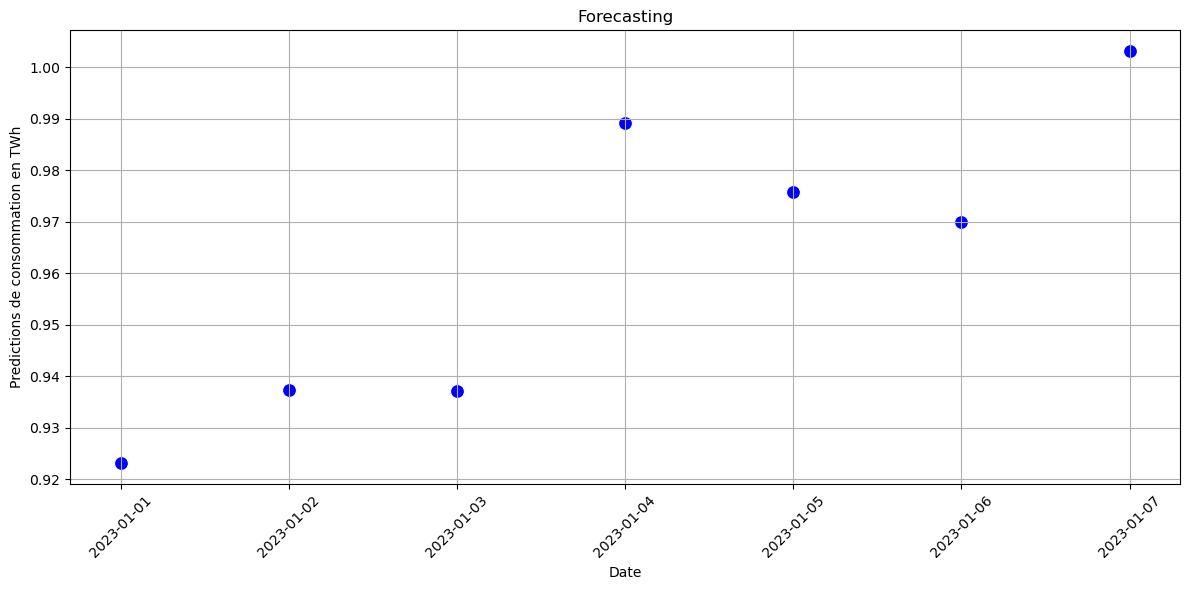

In [114]:
DF['predictions'] = Y_futur

# Créer un nuage de points avec Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(x='time', y='predictions', data=DF, marker='o', color='b', s=100)
plt.title('Forecasting')
plt.xlabel('Date')
plt.ylabel('Predictions de consommation en TWh')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Afficher le graphique
plt.show()

In [169]:
#On est donc capable, en fonction de la température de prévoir la consommation
#Pour faire du pricing, il faudrait prévoir le prix du gaz, malheuresement MSE trop importante avec tous les aglo de machine learning utilisés. Le prix dépend donc peu de températures.

